## compare_cdo_xarray

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from cdo import *
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
cdo =Cdo()

In [2]:
da     = xr.open_dataset('cpc_all_2005-2020.nc')
clim2  = xr.open_dataset("cpc_clim.nc")
da_anom = xr.open_dataset("cpc_daily.anom.nc")

In [3]:
def calc_daily_anomaly(da):
    time  = da.time
    array = da['precip'].values
    month = da['precip'].groupby("time.month").groups              
    for i in month:
        day = da['precip'][month[i]].groupby('time.dayofyear').groups
        for j in day:
            clim = da['precip'][month[i]][day[j]].mean(dim="time")
            anom = da['precip'][month[i]][day[j]]- clim
            ind = np.where(np.in1d(da.time.values,anom.time.values)==1)
            array[ind,:,:]= anom.values
    db=da.copy()
    db['precip'].values=array
    return db

In [5]:
# (da['precip'][month[2]][day[59]]-da['precip'][month[2]][day[59]].mean(dim="time")).sel(lat=20.25,lon =80.25)

In [6]:
# month = da['precip'].groupby("time.month").groups
# day = da['precip'][month[2]].groupby('time.dayofyear').groups
# da['precip'][month[2]][day[59]].sel(lat=20.25,lon =80.25)-da['precip'][month[2]][day[59]].mean(dim="time").sel(lat=20.25,lon =80.25)
# da['precip'].sel(lat=20.25,lon =80.25,time="2015-02-28")

db_anom = calc_daily_anomaly(da)
# month = da['precip'].groupby("time.month").groups             
# for i in month:
#     print(i)
# day = da['precip'][month[2]].groupby('time.dayofyear').groups
# db_anom.sel(lat=20.25,lon =80.25,time="2008-02-29")
# np.where(da.time.values=='2005-01-01')[0]
# db.sel(lat=20.25,lon =80.25,time="2008-02-29")

/home/cccr/roxy/.conda/envs/saranya/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


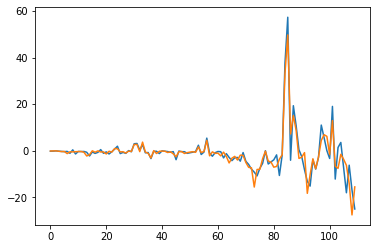

In [7]:
plt.plot(da_anom.sel(lat=20.25,lon =80.25)['precip'][90:200].values)
plt.plot(db_anom.sel(lat=20.25,lon=80.25)['precip'][90:200].values)